# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
import numpy as np
import statsmodels.formula.api as smf

# Dados da gorjeta e seu tratamento:
tips = sns.load_dataset("tips")
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']

# Exibe os dados
tips.head()

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.172069


In [30]:
# Criando a matrix
model = smf.ols('tip ~ sex + smoker + day + net_bill', data=tips).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     20.14
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           5.30e-19
Time:                        18:46:56   Log-Likelihood:                -374.68
No. Observations:                 244   AIC:                             763.4
Df Residuals:                     237   BIC:                             787.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2017      0.258      4.652

In [36]:
# Remover variáveis não significantes (p-value > 0.05
model_new = smf.ols('tip ~ C(day) + net_bill', data=tips).fit()

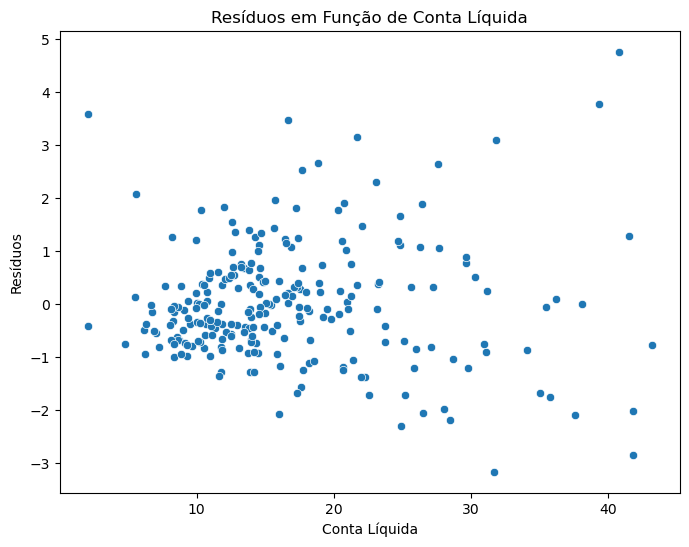

In [38]:
# Gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tips['net_bill'], y=model.resid)
plt.title('Resíduos em Função de Conta Líquida')
plt.xlabel('Conta Líquida')
plt.ylabel('Resíduos')
plt.show()

In [48]:
# Modelo com log de net_bill
model_log = smf.ols('tip ~ sex + smoker + day + np.log(net_bill)', data=tips).fit()
print(model_log.summary())

# Modelo com polinômio de net_bill
net_bill_poly = np.polyval(np.polyfit(tips['net_bill'], tips['tip'], 2), tips['net_bill'])
tips['net_bill_poly'] = net_bill_poly
model_poly = smf.ols('tip ~ sex + smoker + day + net_bill_poly', data=tips).fit()

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     16.83
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           3.61e-16
Time:                        18:57:30   Log-Likelihood:                -381.64
No. Observations:                 244   AIC:                             777.3
Df Residuals:                     237   BIC:                             801.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2944      0.484  

* O melhor modelo seria o primeiro, pois o R² é maior.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [67]:
import patsy

# Criando a matriz através dp Patsy
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + day + net_bill', data=tips, return_type='dataframe')
model = sm.OLS(y, X).fit()
print(model.pvalues)

Intercept        8.585271e-08
sex[T.Female]    8.281514e-01
smoker[T.No]     5.636777e-01
day[T.Fri]       7.618940e-01
day[T.Sat]       7.152932e-01
day[T.Sun]       2.304829e-01
net_bill         3.688075e-20
dtype: float64


In [87]:
# Removendo variáveis não significativas
y, X = patsy.dmatrices('tip ~ day + net_bill', tips)

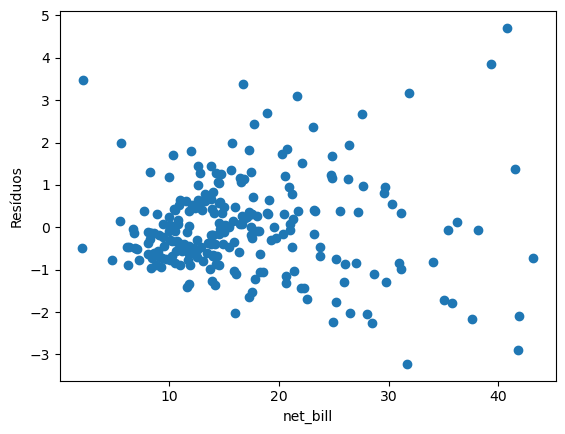

In [89]:
modelo = sm.OLS(y, X).fit()
residuos = modelo.resid
plt.scatter(X[:, -1], residuos)
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.show()

In [91]:
y, X = patsy.dmatrices('tip ~ day + np.log(net_bill)', tips)
modelo_log = sm.OLS(y, X).fit()
print(modelo_log.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     25.46
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           1.40e-17
Time:                        19:34:35   Log-Likelihood:                -381.65
No. Observations:                 244   AIC:                             773.3
Df Residuals:                     239   BIC:                             790.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2742      0.441  

In [93]:
y, X = patsy.dmatrices('tip ~ day + I(net_bill**2)', tips)
modelo_poly = sm.OLS(y, X).fit()
print(modelo_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     26.34
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           4.19e-18
Time:                        19:34:44   Log-Likelihood:                -380.40
No. Observations:                 244   AIC:                             770.8
Df Residuals:                     239   BIC:                             788.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.2017      0.158  

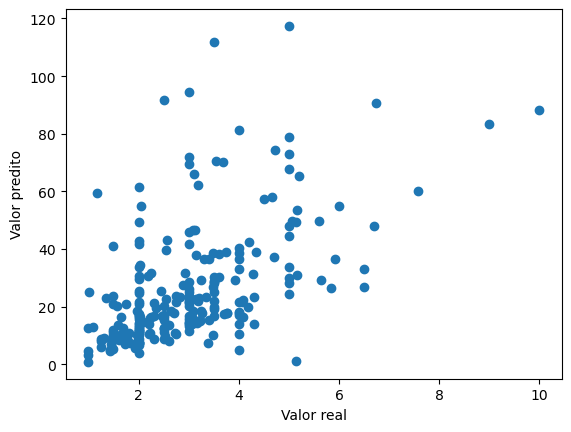

In [124]:
import matplotlib.pyplot as plt

plt.scatter(tips['tip'], y_pred_final)
plt.xlabel('Valor real')
plt.ylabel('Valor predito')
plt.show()

In [126]:
print("Média dos valores reais:", np.mean(tips['tip']))
print("Desvio padrão dos valores reais:", np.std(tips['tip']))
print("Média dos valores preditos:", np.mean(y_pred_final))
print("Desvio padrão dos valores preditos:", np.std(y_pred_final))

Média dos valores reais: 2.99827868852459
Desvio padrão dos valores reais: 1.3807999538298958
Média dos valores preditos: 26.25061451263765
Desvio padrão dos valores preditos: 20.602039942713382


### Como o modelo está em 'overfitting' e predizendo valores muito altos, vou ajustar utilizando o 'Lasso Regression'.

In [131]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Escalar as variáveis X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir o modelo com L1 regularization
model = Lasso(alpha=0.1)

# Treinar o modelo com os valores escalados de X e os valores originais de y
model.fit(X_scaled, tips['tip'])

# Prever os valores
y_pred_final = model.predict(X_scaled)

# Calcular o R²
r2 = model.score(X_scaled, tips['tip'])
print("R² do modelo final:", r2)

R² do modelo final: 0.29635903339296343


In [139]:
# Resultado do item 01
print("R² do modelo do item 1:", model_log.rsquared)

R² do modelo do item 1: 0.29880400724013134


In [135]:
if r2_final_tip > model_log.rsquared:
    print("O modelo final tem melhor coeficiente de determinação.")
else:
    print("O modelo do item 1 tem melhor coeficiente de determinação.")

O modelo do item 1 tem melhor coeficiente de determinação.


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Carregue a base de dados
df = pd.read_csv('G:\Downloads\previsao_de_renda.csv')

In [42]:
print(df.isnull().sum())

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64


In [90]:
# Substituindo os valores faltantes pela mediana
df['tempo_emprego'] = df['tempo_emprego'].fillna(df['tempo_emprego'].median())
df['renda'] = df['renda'].fillna(df['renda'].median())

# Criando o objeto StandardScaler
scaler = StandardScaler()

# Normalize os dados
df[['tempo_emprego', 'renda']] = scaler.fit_transform(df[['tempo_emprego', 'renda']])

# Dividindo o conjunto de dados em variáveis explicativas (X) e variável resposta (y)
X = df[['tempo_emprego']]
y = df['renda']

# Dividindo o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie um modelo de regressão linear
model = LinearRegression()

# Modelo com os dados de treinamento
model.fit(X_train, y_train)

# Previsões com os dados de teste
y_pred = model.predict(X_test)

# Erro quadrático médio (MSE)
mse = mean_squared_error(y_test, y_pred)

print(f'Erro quadrático médio (MSE): {mse:.2f}')

Erro quadrático médio (MSE): 0.61


* Como a base possui dados faltantes, coloquei a mediana da variável para substituirmos os dados faltantes e não ter a necessidade de excluir todas as linhas que apresentam dados faltantes.

In [100]:
import statsmodels.api as sm

# Defina a variável resposta (renda) e a variável explicativa (tempo_emprego)
y = df['renda']
x = df['tempo_emprego']

# Adicione uma constante (intercept) à variável explicativa
x = sm.add_constant(x)

# Ajuste o modelo de regressão linear simples
model = sm.OLS(y, x).fit()

# Resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     2633.
Date:                Wed, 21 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:42:00   Log-Likelihood:                -20071.
No. Observations:               15000   AIC:                         4.015e+04
Df Residuals:                   14998   BIC:                         4.016e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -1.18e-17      0.008  -1.57e-15

* Com a substituição dos valores faltantes pela mediana, obtivemos um erro quadrático médio de 0.61, sendo considerado um valor razoável de 'spread' de dispersão. Já o R², chegamos no valor de 0.149, sugerindo que a variável 'tempo_emprego' não é um bom preditor para a variável 'renda'.  

In [102]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Escala os dados utiluzando StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Seleciona as melhores variáveis que melhoram a performance do modelo
selector = SelectKBest(f_classif, k='all')
X_selected = selector.fit_transform(X_scaled, y)

# Mostra as features selecionadas
print("Variáveis selecionadas:", X.columns[selector.get_support(indices=True)])

Variáveis selecionadas: Index(['tempo_emprego'], dtype='object')


In [104]:
from sklearn.metrics import mean_squared_error, r2_score

# Treina um modelo de regressão linear com as variáveis selecionadas
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled[:, selector.get_support(indices=True)], y_train)

# Previsões com os dados de teste
y_pred = model.predict(X_test_scaled[:, selector.get_support(indices=True)])

# Performance do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 0.6075181679614117
R2 Score: 0.15275306349590034


* Nesse ponto, o modelo apresentou um R² maior do que o anterior, sendo melhor e mais assertivo. Porém, ainda não é um bom parâmetro de previsibilidade.

In [106]:
# Interpreta os resultados, considerando a escala dos dados normalizados
print("Coeficientes do modelo:")
print(model.coef_)

Coeficientes do modelo:
[0.39680485]
